<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Natural%20Language%20Processing%20using%20Gensim/Sentiment_analysis_physic_vs_chemistry_vs_biology_with_Gensim_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import gensim
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
from textblob import Word



Reading data

In [ ]:
train_set = pd.read_csv('/content/dataset/train.csv')
train_set.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [ ]:
test_set = pd.read_csv('/content/dataset/test.csv')
test_set.head()

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics


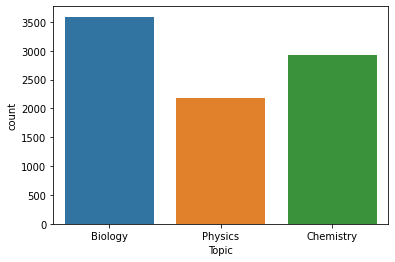

In [ ]:
sns.countplot(x = 'Topic', data = train_set)

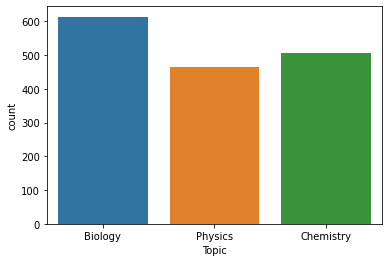

In [ ]:
sns.countplot(x = 'Topic', data = test_set)

In [ ]:
train_set.isnull().sum()

Id         0
Comment    0
Topic      0
dtype: int64

In [ ]:
test_set.isnull().sum()

Id         0
Comment    0
Topic      0
dtype: int64

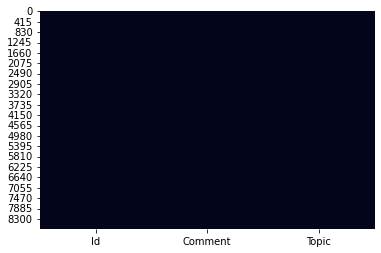

In [ ]:
sns.heatmap(train_set.isnull(), cbar = False)

In [ ]:
print(train_set.shape, test_set.shape)

(8695, 3) (1586, 3)


In [ ]:
set = pd.concat([train_set, test_set], axis = 0, ignore_index = True)
set

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
10276,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
10277,0x1f4a,i really empathize with your compassion for bu...,Biology
10278,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
10279,0x2066,Same here. I’m in nursing school so I only hav...,Biology


In [ ]:
set.Topic.value_counts()

Biology      4205
Chemistry    3426
Physics      2650
Name: Topic, dtype: int64

In [ ]:
set = set[set.Topic.isin(['Biology', 'Physics', 'Chemistry'])]

In [ ]:
possible_labels = set.Topic.unique()

In [ ]:
label_dict = {}

for index, possible_label in enumerate(possible_labels):
  label_dict[possible_label] = index

In [ ]:
label_dict

{'Biology': 0, 'Chemistry': 2, 'Physics': 1}

In [ ]:
set.Topic = set['Topic'].map(label_dict)
set.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,0
1,0xbf0,Is it so hard to believe that there exist part...,1
2,0x1dfc,There are bees,0
3,0xc7e,I'm a medication technician. And that's alot o...,0
4,0xbba,Cesium is such a pretty metal.,2


Preprocessing Gensim

In [ ]:
review_txt = set.Comment.apply(gensim.utils.simple_preprocess)
review_txt

0        [few, things, you, might, have, negative, freq...
1        [is, it, so, hard, to, believe, that, there, e...
2                                       [there, are, bees]
3        [medication, technician, and, that, alot, of, ...
4                        [cesium, is, such, pretty, metal]
                               ...                        
10276    [not, really, denying, your, intent, doubting,...
10277    [really, empathize, with, your, compassion, fo...
10278    [if, you, want, to, keep, it, for, more, than,...
10279    [same, here, in, nursing, school, so, only, ha...
10280    [the, video, basically, says, read, pop, sci, ...
Name: Comment, Length: 10281, dtype: object

In [ ]:
rev=[0]*10281
for i in range(0,10281):
    str=" "
    re=review_txt[i]
    rev[i]=str.join(re)

In [ ]:
cv1 = CountVectorizer()
gen = cv1.fit_transform(rev)
print(gen)

  (0, 6624)	1
  (0, 18338)	1
  (0, 20306)	1
  (0, 10881)	2
  (0, 7943)	4
  (0, 11731)	1
  (0, 7063)	1
  (0, 4587)	1
  (0, 16205)	2
  (0, 7519)	2
  (0, 12880)	2
  (0, 19935)	2
  (0, 18264)	17
  (0, 9854)	1
  (0, 3350)	3
  (0, 13654)	4
  (0, 15179)	1
  (0, 2313)	1
  (0, 7348)	3
  (0, 9274)	7
  (0, 18519)	9
  (0, 701)	3
  (0, 332)	1
  (0, 8707)	8
  (0, 5924)	2
  :	:
  (10280, 18519)	3
  (10280, 8555)	1
  (10280, 744)	1
  (10280, 12808)	1
  (10280, 19263)	1
  (10280, 15013)	1
  (10280, 18276)	1
  (10280, 9133)	1
  (10280, 5194)	1
  (10280, 11715)	1
  (10280, 19558)	2
  (10280, 9646)	1
  (10280, 18496)	1
  (10280, 7506)	1
  (10280, 19752)	1
  (10280, 10137)	1
  (10280, 14783)	1
  (10280, 14984)	1
  (10280, 1478)	1
  (10280, 1950)	1
  (10280, 15976)	1
  (10280, 14025)	1
  (10280, 3459)	1
  (10280, 3367)	1
  (10280, 16045)	2


In [ ]:
print(gen[1])

  (0, 9274)	1
  (0, 18519)	3
  (0, 16844)	2
  (0, 13070)	2
  (0, 9310)	2
  (0, 18254)	3
  (0, 18295)	1
  (0, 7888)	1
  (0, 1611)	1
  (0, 6233)	1
  (0, 13344)	1
  (0, 19831)	2
  (0, 2408)	1
  (0, 4701)	2
  (0, 20058)	1
  (0, 880)	1
  (0, 19460)	1
  (0, 9172)	1
  (0, 6487)	1
  (0, 11977)	1
  (0, 10590)	1
  (0, 10205)	1
  (0, 8336)	1
  (0, 10199)	1
  (0, 18570)	1
  (0, 8373)	1
  (0, 6693)	1
  (0, 19825)	1
  (0, 14859)	1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gen, set.Topic, train_size = 0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
pre = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predic = rf.predict(X_test)
print(accuracy_score(predic, y_test))

0.6674769081186194
